In [48]:
import numpy as np
import tensorflow as tf
import keras
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
# Check for corrupt images
from os import listdir
import cv2

dirPath = r'../input/face-recognition-dataset/Original Images/Original Images/'
for namePath in os.listdir(dirPath):
    for fileName in os.listdir(os.path.join(dirPath, namePath)):
        if fileName.endswith(".jpg"):
            print(os.path.join(dirPath, namePath, fileName))
            #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
            cv2.imread(os.path.join(dirPath, namePath, fileName))
        else:
            print(os.path.join(dirPath, namePath, fileName))
            print("Not a jpg file!")
    

../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_4.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_33.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_17.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_45.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_51.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_34.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_65.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_39.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_29.jpg
../input/face-recognition-dataset/Original Images/Original Images/Alia Bhatt/Alia Bhatt_64.jpg
../input/face-recognition-dataset/Original Images/O

In [89]:
data_dir="../input/face-recognition-dataset/Original Images/Original Images/"
img_height = 224
img_width = 224
batch_size = 32

# Using ImageDataGenerator for data augmentation
generator = ImageDataGenerator(
    rescale=1./255, # Normalise
    validation_split=0.2  # 10% of the data will be used for validation
)

# Load and split the data into training and validation sets
train_ds = generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    subset="training"  # This is for training data
)

val_ds = generator.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    subset="validation"  # This is for validation data
)

Found 2060 images belonging to 31 classes.
Found 502 images belonging to 31 classes.


In [64]:
# Our Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))


# Early stopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
# Compiling the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

In [ ]:
# Fitting hte model
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs= 30,  
                    batch_size=32,
                   callbacks = [early_stopping])

In [ ]:
# Plotting results
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [23]:
# Function to test the model and display predicted results
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

Let's predict some famous people

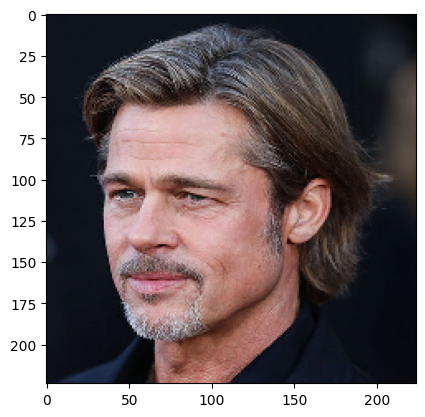

2024-03-25 07:35:46.823663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 147863: 4.14435, expected 3.59734
2024-03-25 07:35:46.823733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148032: 3.73171, expected 3.1847
2024-03-25 07:35:46.823749: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 148049: 4.2981, expected 3.75109
2024-03-25 07:35:46.823769: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149297: 4.2275, expected 3.68049
2024-03-25 07:35:46.823780: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149362: 3.89754, expected 3.35053
2024-03-25 07:35:46.823790: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149444: 4.35104, expected 3.80403
2024-03-25 07:35:46.823802: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 149482: 4.25819, expected 3.71118
2024-03-25 07:35:46.823

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
Actual: Brad Pitt
Predicted: Brad Pitt


In [24]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_102.jpg")

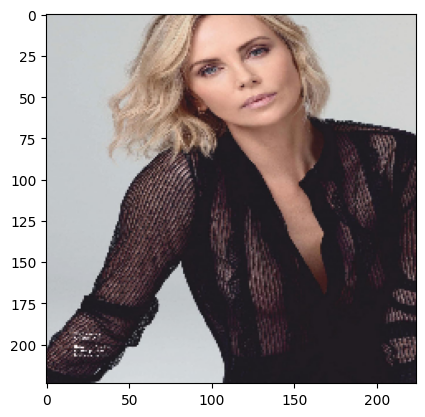

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Charlize Theron
Predicted: Charlize Theron


In [25]:
predict_image("../input/face-recognition-dataset/Test Images/Charlize Theron/Charlize Theron_26.jpg")

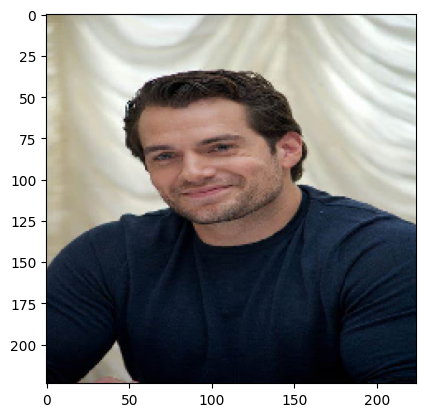

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Henry Cavill
Predicted: Henry Cavill


In [26]:
predict_image("../input/face-recognition-dataset/Test Images/Henry Cavill/Henry Cavill_28.jpg")

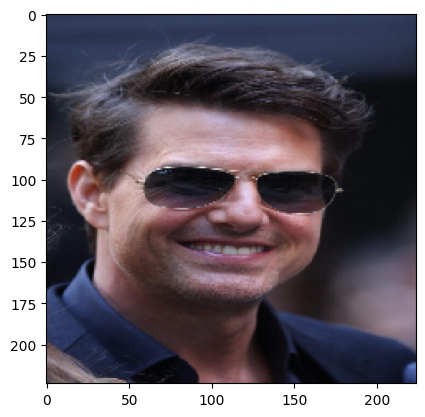

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Tom Cruise
Predicted: Tom Cruise


In [27]:
predict_image("../input/face-recognition-dataset/Test Images/Tom Cruise/Tom Cruise_27.jpg")

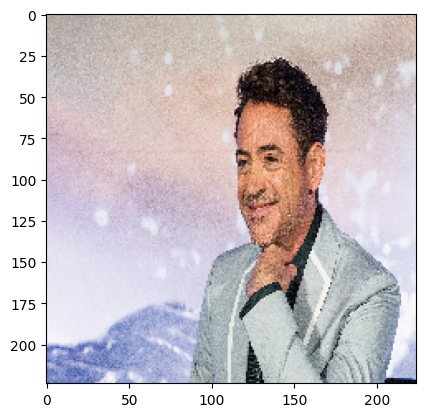

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Robert Downey Jr
Predicted: Robert Downey Jr


In [28]:
predict_image("../input/face-recognition-dataset/Test Images/Robert Downey Jr/Robert Downey Jr_106.jpg")

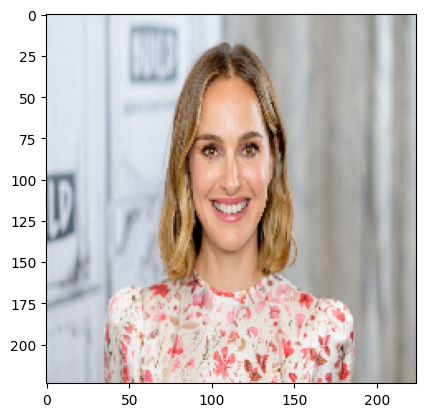

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Natalie Portman
Predicted: Claire Holt


In [36]:
predict_image("../input/face-recognition-dataset/Test Images/Natalie Portman/Natalie Portman_25.jpg")

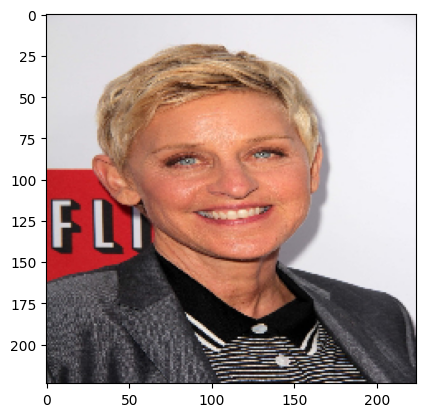

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Ellen Degeneres
Predicted: Ellen Degeneres


In [31]:
predict_image("../input/face-recognition-dataset/Test Images/Ellen Degeneres/Ellen Degeneres_20.jpg")

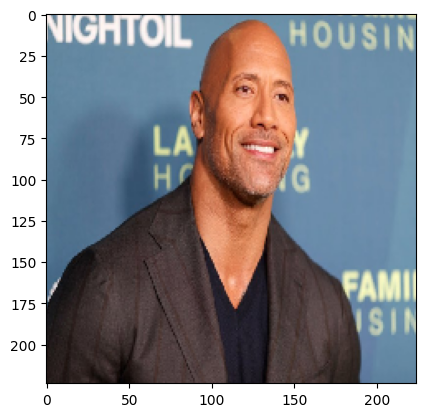

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual: Dwayne Johnson
Predicted: Dwayne Johnson


In [32]:
predict_image("../input/face-recognition-dataset/Test Images/Dwayne Johnson/Dwayne Johnson_29.jpg")

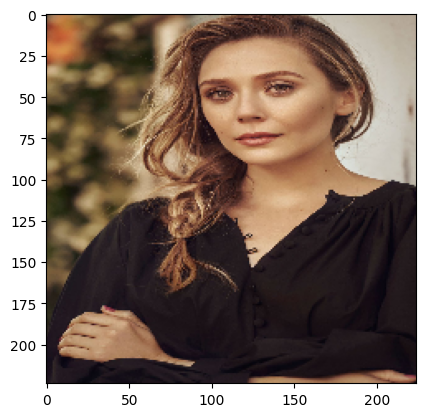

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual: Elizabeth Olsen
Predicted: Elizabeth Olsen


In [38]:
predict_image("../input/face-recognition-dataset/Test Images/Elizabeth Olsen/Elizabeth Olsen_11.jpg")